<a href="https://colab.research.google.com/github/DeepthiTabithaBennet/Python_DeepLearning/blob/main/ANN_IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris Flower Classification Using ANN**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df_path = '/content/gdrive/My Drive/Deep Learning Datasets/Iris.csv'
df = pd.read_csv(df_path)

In [ ]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<Axes: >

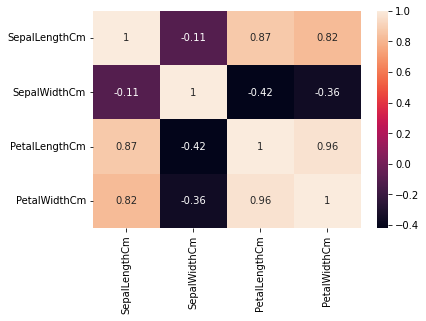

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
df = df.dropna()

In [ ]:
TARGET_NAME = 'Species'

X = df.drop(TARGET_NAME, axis=1)
y = df[TARGET_NAME]

In [ ]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# X = df.iloc[:, 0:4].values
# y = df.iloc[:, 4].values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(4, activation='LeakyReLU'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs=100, validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 3.3939 - accuracy: 0.2604 - val_loss: 1.4638 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 1.2822 - accuracy: 0.0417 - val_loss: 1.3060 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 1.1105 - accuracy: 0.1146 - val_loss: 1.1942 - val_accuracy: 0.1250
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 1.0067 - accuracy: 0.4375 - val_loss: 1.0073 - val_accuracy: 0.2917
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.9425 - accuracy: 0.5208 - val_loss: 1.0328 - val_accuracy: 0.5417
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8731 - accuracy: 0.6979 - val_loss: 0.9080 - val_accuracy: 0.4583
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.8103 - accuracy: 0.7604 - val_loss: 0.8487 - val_accuracy: 0.4583
Epo

In [ ]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(y_test_class)
print(y_pred_class)

1/1 [==============================] - 0s 45ms/step
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
op = model.predict([[0.1, 0.5, 0.4, 5.2]])
print(np.argmax(op, axis=1))

1/1 [==============================] - 0s 72ms/step
[2]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
